In [1]:
import csv
import gensim.models.keyedvectors as kv

from sklearn import cluster
import numpy as np

import nltk
from nltk.corpus import stopwords
import bz2

model = kv.KeyedVectors.load_word2vec_format(bz2.open("../models/drama-17412.w2v.bz2"))

In [2]:
# create vocab list
vocab = list(model.vocab)
print("found {0} words in vocab".format(len(vocab)))

found 520780 words in vocab


In [3]:
rows=list()
# open Harvard Inquirer
with open('../lexicons/Harvard_Inquirer-inqtabs.txt', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(reader):
        if i == 0:
            header = row
        else:
            rows.append(row)

In [4]:
# extract words of interest
categories = ["Pleasur","Pain","Feel","Arousal","Relig","Exprsv","Polit@"]
inquirer = dict()
for c in categories:
    
    # extract index from header
    idx = header.index(c)
    
    # extract words and drop to lowercase
    inquirer[c] = [w[0].lower() for w in rows if w[idx] != '']
    
    # remove alternate meanings and reduce duplicates
    inquirer[c] = list(set([w.split("#")[0] for w in inquirer[c]]))

In [8]:
# now calculate distance to other groups
dist_matrix_values = list()
for c in categories:
    mt = [w for w in inquirer[c] if w in vocab]
    dist_matrix_values.append(np.mean(model[mt],axis=0))

In [9]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [10]:
dist_matrix = squareform(pdist(np.array(dist_matrix_values)))

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.clustermap(dist_matrix,cmap='Blues',fmt='g',
              annot=True,
              yticklabels=categories,
              xticklabels=categories)
plt.show()

/home/jed/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


<Figure size 1000x1000 with 4 Axes>

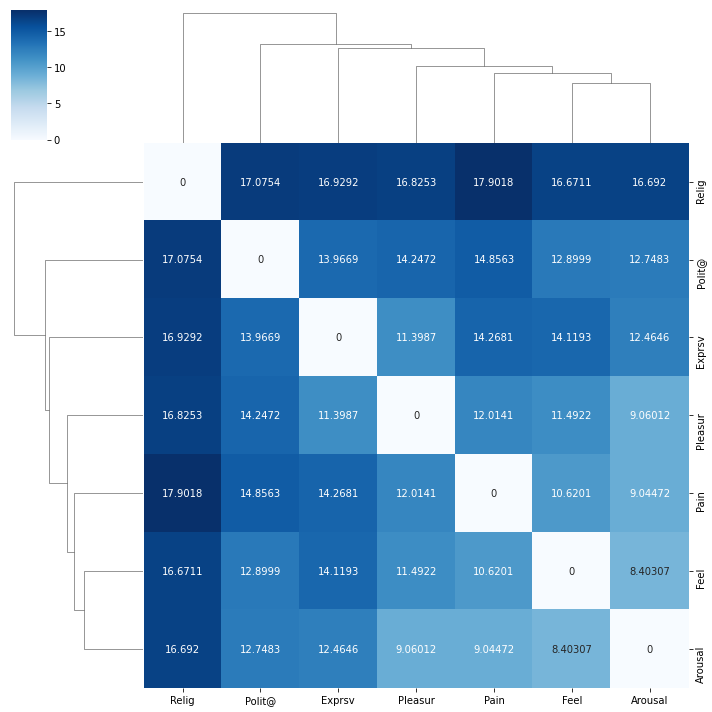

In [12]:
# try again
sb.clustermap(dist_matrix,cmap='Blues',fmt='g',
              annot=True,
              yticklabels=categories,
              xticklabels=categories)